In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#reading the data

data = pd.read_excel("ANZ.xlsx")

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
#the columns in data
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [5]:
#selecting the necessary columns, with numerical data
data=data[["customer_id","age","txn_description","balance","amount"]]

In [6]:
data.head()

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42
3,CUS-1614226872,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,26,SALES-POS,17.95,3.25


In [7]:
#Getting the unique values for the types of transactions

print(data['txn_description'].unique())

['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


In [8]:
plot_data= data.groupby(["customer_id"]).mean().reset_index()
plot_data.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53,2275.852055,222.862603
1,CUS-1117979751,21,9829.929000,339.843700
2,CUS-1140341822,28,5699.212250,212.632500
3,CUS-1147642491,34,9032.841186,245.600169
4,CUS-1196156254,34,22272.433755,147.145796


Now we need to create a few new features. We can look at how much on an average, a customer spends on a type of transaction and use that as a feature. The reason being, expenditure is related to salary. Person will higher salary will be more likely to spend more money, hence. 

# Finding out the mean salary of each customer

In [9]:
#Finding the Salary for all the customers

salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})

In [10]:
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


# Create some plots to analyze relation between existing data

In [11]:
plot_data=pd.merge(plot_data, salary, on="customer_id")
plot_data.head()

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53,2275.852055,222.862603,970.47
1,CUS-1117979751,21,9829.929000,339.843700,3578.65
2,CUS-1140341822,28,5699.212250,212.632500,1916.51
3,CUS-1147642491,34,9032.841186,245.600169,1711.39
4,CUS-1196156254,34,22272.433755,147.145796,3903.73


## Salary and age.

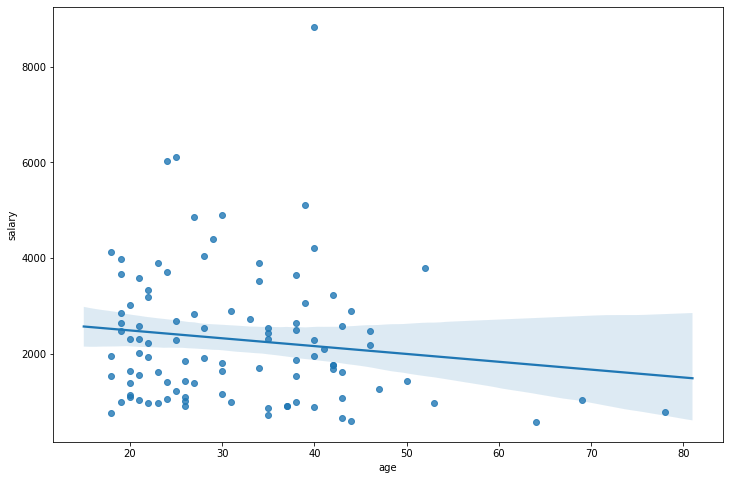

In [12]:
plt.figure(figsize=(12, 8))
sns.regplot("age", "salary", data=plot_data)

## Salary and Account Balance

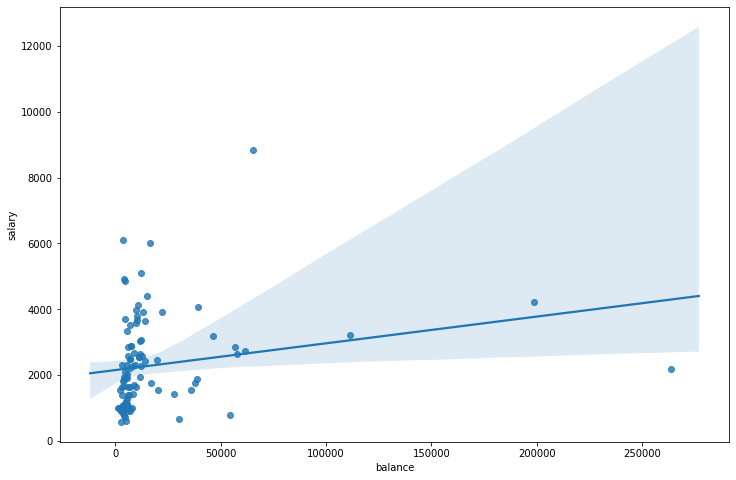

In [13]:
plt.figure(figsize=(12, 8))
sns.regplot("balance", "salary", fit_reg=True, data=plot_data)

## Salary and Transaction Amount

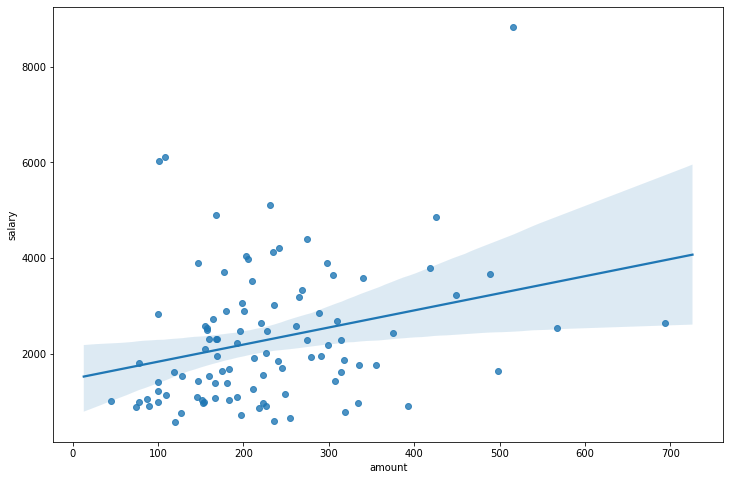

In [14]:
plt.figure(figsize=(12, 8))
sns.regplot("amount", "salary", fit_reg=True, data=plot_data)

# Creating New Features

# Finding out mean POS (Point of Sale) for each customer

In [15]:
#POS indicates transaction made at any business or such, thus it reflects spending behaviour of customer

pos=data[data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})

In [16]:
pos.head()

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


In [17]:
len(pos)

100

# Finding out the mean "PAYMENT" made by the customer

In [18]:
#Bills and payments made my customer

payment=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})

In [19]:
payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [20]:
len(payment)

100

# Finding out the mean 'INTER BANK', that is Bank to Bank transfer by each customer

In [21]:
#Bank transfer values

interbank=data[data["txn_description"]=='INTER BANK'].groupby("customer_id").mean().reset_index()
interbank=interbank[["customer_id","amount"]]
interbank=interbank.rename(columns = {'amount':'interbank'})

In [22]:
interbank.head()

,customer_id,interbank
0,CUS-1117979751,1001.0000
1,CUS-1140341822,90.0000
2,CUS-1147642491,125.0000
3,CUS-1196156254,153.4000
4,CUS-1271030853,76.1875


In [23]:
len(interbank)

68

# Finding out the mean "PHONE BANK" made by the customer

In [24]:
#Banking via phone/online pay

phonebank=data[data["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
phonebank=phonebank[["customer_id","amount"]]
phonebank=phonebank.rename(columns = {'amount':'phonebank'})

In [25]:
phonebank.head()

,customer_id,phonebank
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0


In [26]:
len(phonebank)

16

We created a few new features, but these features do not have data for all customers. Salary, pos and payment could be determined for all the customers, but interbank and phone bank could not be determined, due to lack of data.

# Combining relevant data into a single dataframe

In [27]:
customer=data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
customer.head()

,customer_id,age,balance
0,CUS-1005756958,53,2275.852055
1,CUS-1117979751,21,9829.929000
2,CUS-1140341822,28,5699.212250
3,CUS-1147642491,34,9032.841186
4,CUS-1196156254,34,22272.433755


In [28]:
df=pd.merge(customer, payment, on="customer_id")
df=pd.merge(df, pos, on="customer_id")
df=pd.merge(df, salary, on="customer_id")

In [29]:
df.head()

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73


## Relations For New Features
## Salary vs Payments

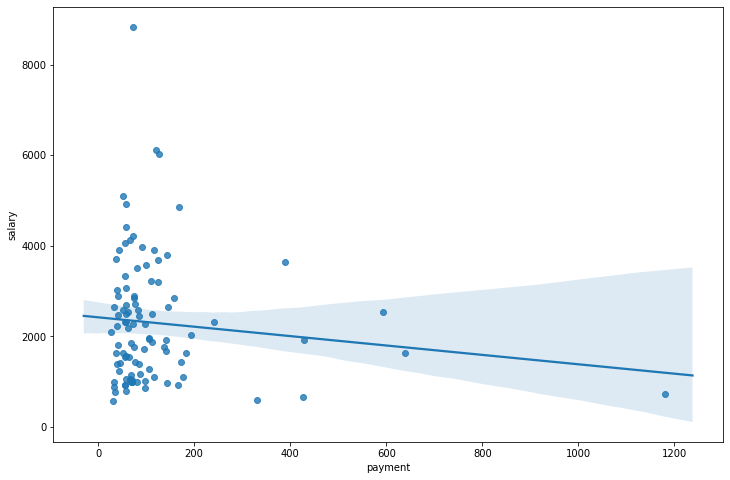

In [30]:
plt.figure(figsize=(12, 8))
sns.regplot("payment", "salary", fit_reg=True, data=df)

## Salary vs Point Of Sale

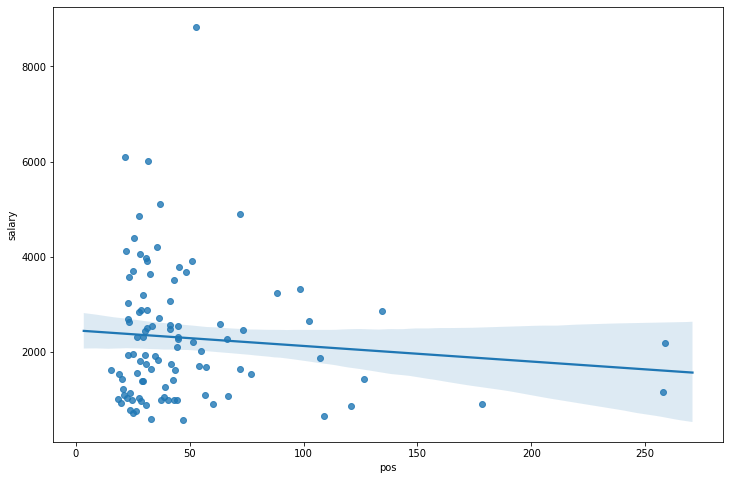

In [31]:
plt.figure(figsize=(12, 8))
sns.regplot("pos", "salary", fit_reg=True, data=df)

# Linear Regression Model

In [32]:
#Defining the X and y of machine learning

X=df[["age","balance","payment","pos"]].values
y=df["salary"].values

In [33]:
#Train,Test splitting

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [34]:
#Linear Regression model

lr = LinearRegression()

In [35]:
#Fitting the model
lr.fit(X_train, y_train)
lr.score(X, y)

0.11930439490077771

In [36]:
#Prediction using 

y_pred=lr.predict(X_test)

In [37]:
#r2 score
print('Coefficient of determination: ', r2_score(y_test, y_pred))

Coefficient of determination:  0.07666219584715894


In [38]:
#Here we make a sample prediction
#age=50
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar

In [39]:
print("The model predicts salary will be=")
print(lr.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
1467.1295983855503


# DecisionTreeRegressor

In [40]:
#decision tree regressor 
dt = DecisionTreeRegressor()

In [41]:
#fitting the score and model score

dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [42]:
#prediction of  test values

dt.predict(X_test)

array([1272.47, 2639.76, 3517.61, 2218.73, 3071.14, 3649.51, 1916.51,
       1002.13, 2280.36, 1272.47,  576.  , 2500.  , 3026.95, 2639.76,
       3676.94, 2443.24, 2320.3 , 3676.94, 4910.9 , 3517.61])

In [43]:
#score using test values
dt.score(X_test, y_test)

-0.008153812510585334

In [44]:
#Here we make a sample prediction
#age=50
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar

In [45]:
print("The model predicts salary will be=")
print(dt.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
1272.4699999999998


The Decision Tree Regressor usually predicts lower than the Linear Rigression Model.

It has to be pointed out that the model has low score due to lack of data.

Given more data, we can make the model more accurate.

# Customer Segmentation using KMeans Clustering

The previous algorithms were supervised learning algorithms.

Now we shall apply a unsupervised learning algorithm, to sort the customers into clusters based on age and financial data.

In [46]:
#The data we shall be working with

df

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73
...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,1180.000000,25.022143,725.32
96,CUS-809013380,21,3756.902903,70.136364,22.255098,1037.07
97,CUS-860700529,30,3462.276009,41.933333,28.164845,1808.62
98,CUS-880898248,26,8528.830385,77.500000,20.101429,1433.98


In [47]:
#Taking the X data

X=df[["age","balance","payment","pos","salary"]]
X.shape

(100, 5)

In [48]:
#Trying K from 1 to 11

wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

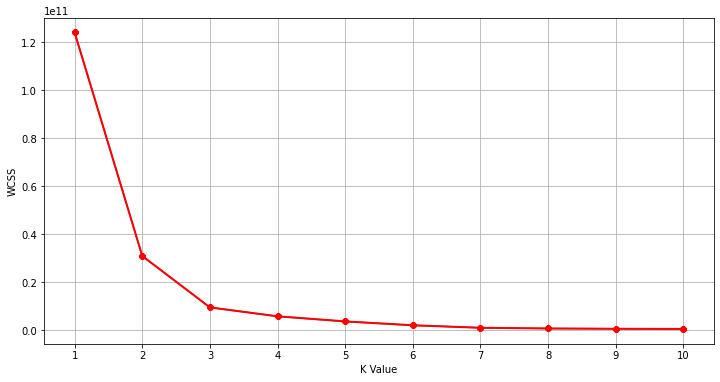

In [49]:
#The elbow curve

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [50]:
#The elbow is at K=3

km=KMeans(n_clusters=3)
clusters = km.fit_predict(X)
df["label"] = clusters

In [51]:
#We can see label column has been added

df

,customer_id,age,balance,payment,pos,salary,label
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47,0
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65,0
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51,0
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39,0
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73,0
...,...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,1180.000000,25.022143,725.32,0
96,CUS-809013380,21,3756.902903,70.136364,22.255098,1037.07,0
97,CUS-860700529,30,3462.276009,41.933333,28.164845,1808.62,0
98,CUS-880898248,26,8528.830385,77.500000,20.101429,1433.98,0


In [52]:
#Printing the data

In [53]:
print("Customers classified in the fist group")
print(" ")
print(df[df["label"]==0])

Customers classified in the fist group
 
       customer_id  age       balance      payment        pos   salary  label
0   CUS-1005756958   53   2275.852055   144.000000  28.769615   970.47      0
1   CUS-1117979751   21   9829.929000    98.925000  23.321923  3578.65      0
2   CUS-1140341822   28   5699.212250   142.000000  34.781282  1916.51      0
3   CUS-1147642491   34   9032.841186    96.185185  54.271316  1711.39      0
4   CUS-1196156254   34  22272.433755    43.100000  31.157432  3903.73      0
..             ...  ...           ...          ...        ...      ...    ...
95    CUS-72755508   35   4497.557069  1180.000000  25.022143   725.32      0
96   CUS-809013380   21   3756.902903    70.136364  22.255098  1037.07      0
97   CUS-860700529   30   3462.276009    41.933333  28.164845  1808.62      0
98   CUS-880898248   26   8528.830385    77.500000  20.101429  1433.98      0
99   CUS-883482547   19   9877.452697    91.446809  30.635098  3977.46      0

[87 rows x 7 columns]


In [54]:
print("Customers classified in the 2nd group")
print(" ")
print(df[df["label"]==1])

Customers classified in the 2nd group
 
       customer_id  age        balance    payment         pos   salary  label
43  CUS-2370108457   46  263753.766119  61.750000  258.643636  2179.96      1
91   CUS-527400765   40  198565.143775  72.216216   35.570500  4216.04      1


In [55]:
print("Customers classified in the 3rd group")
print(" ")
print(df[df["label"]==2])

Customers classified in the 3rd group
 
       customer_id  age        balance     payment         pos   salary  label
17  CUS-1609060617   19   56685.795802   75.454545  134.343000  2854.74      2
21  CUS-1646183815   78   54240.641471   58.437500   23.736667   782.42      2
27  CUS-1816693151   40   65420.404231   73.567568   52.825455  8835.98      2
33  CUS-2059096722   21   35816.951949   58.914286   27.022973  1560.20      2
53  CUS-2663907001   28   39427.873576   55.192771   28.165200  4054.77      2
57  CUS-2819545904   42  111300.797619  109.800000   88.541818  3231.26      2
60  CUS-3117610635   33   61491.350647   76.863636   36.737391  2718.51      2
63  CUS-3151318058   42   37842.077755   75.684211   30.715000  1757.82      2
67  CUS-3249305314   38   38687.672843  111.214286  107.296250  1880.95      2
77  CUS-3462882033   22   46338.733837  124.500000   29.371304  3195.01      2
87   CUS-495599312   38   57566.579032  144.500000  102.412500  2647.38      2
